## About This Data and Evaluation Metrics

### About the Data
This dataset is related to breast cancer classification. Each row represents a patient, and the features describe characteristics of the cell nuclei present in the image. The target variable (`y`) indicates whether the tumor is **malignant (0)** or **benign (1)**.

### What is a Confusion Matrix?
A **confusion matrix** is a table used to evaluate the performance of a classification model.  
- Each row represents the actual class.
- Each column represents the predicted class.
- The diagonal values (from top-left to bottom-right) are the correct predictions.
- The off-diagonal values are the misclassifications.

### Why Are These Metrics Important?
- **Accuracy** gives an overall idea of performance, but can be misleading if classes are imbalanced.
- **Precision** is important when the cost of a false positive is high.
- **Recall** is important when the cost of a false negative is high (e.g., missing a cancer diagnosis).
- **F1 Score** is useful when you want a balance between precision and recall.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [3]:
unique_vals, counts = np.unique(y, return_counts=True)
print(unique_vals, counts)

[0 1] [212 357]


In [4]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaler, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### Building a Model for Prediction

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

## Model Evaluation

In [8]:
accuracy_train = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_train:.3f}")

Accuracy: 0.947


### Classification Report

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Each Label (Class) Performance

### Class 0 (Malignant) 🟥

- **Precision = 0.93**  
  → Out of all predictions where the model said "0" (malignant), **93% were actually malignant**.
- **Recall = 0.93**  
  → Out of all actual malignant cases, **93% were correctly identified** by the model.
- **F1-score = 0.93**  
  → This is the harmonic mean of precision and recall, summarizing the model's ability to both find and correctly label malignant cases.
- **Support = 43**  
  → There were **43 actual malignant cases** in the test set.

### Class 1 (Benign) 🟩

- **Precision = 0.96**  
  → Out of all predictions where the model said "1" (benign), **96% were actually benign**.
- **Recall = 0.96**  
  → Out of all actual benign cases, **96% were correctly identified** by the model.
- **F1-score = 0.96**  
  → This value combines precision and recall for benign cases.
- **Support = 71**  
  → There were **71 actual benign cases** in the test set.

---

**Interpretation:**  
- The model performs very well for both classes, with high precision and recall.
- The confusion matrix above visually confirms that the model makes very few mistakes (only 3 false positives and 3 false negatives).
- These metrics show the model is reliable for both detecting malignant and benign tumors.



### Confuision Matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[40,  3],
       [ 3, 68]])

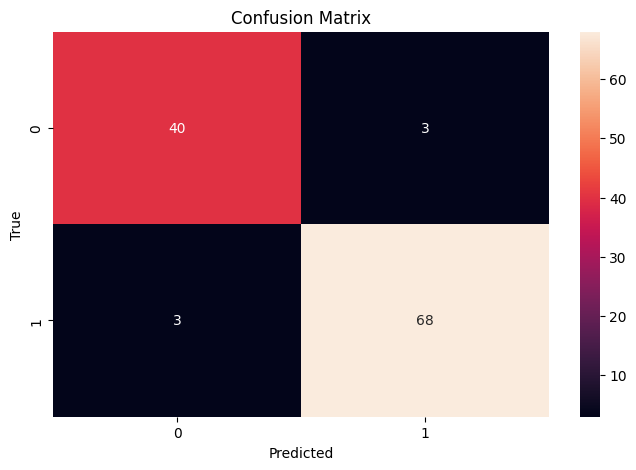

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


For example, in the matrix above:
- **40**: True Negatives (class 0 correctly predicted as 0)
- **68**: True Positives (class 1 correctly predicted as 1)
- **3**: False Positives (class 0 incorrectly predicted as 1)
- **3**: False Negatives (class 1 incorrectly predicted as 0)

### What Do the Metrics Mean?
In the code, we calculate four important metrics to evaluate the model:

- **Accuracy**:  
  The percentage of total correct predictions (both classes) out of all predictions.  
  `Accuracy = (TP + TN) / (TP + TN + FP + FN)`

- **Precision**:  
  Of all the samples predicted as positive (class 1), how many were actually positive?  
  `Precision = TP / (TP + FP)`

- **Recall**:  
  Of all the actual positive samples, how many did the model correctly identify?  
  `Recall = TP / (TP + FN)`

- **F1 Score**:  
  The harmonic mean of precision and recall. It balances the two metrics.  
  `F1 = 2 * (Precision * Recall) / (Precision + Recall)`


In [12]:
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

True Positives: 68
True Negatives: 40
False Positives: 3
False Negatives: 3


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = ['accuracy', 'precision_score', 'recall_score', 'f1_score']

for metric in metrics:
    
    if metric == 'accuracy':
        accuracy_score = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy_score:.3f}")
        
    elif metric == 'precision_score':
        precision_scor = precision_score(y_test, y_pred)
        print(f"Precision: {precision_scor:.3f}")

    elif metric == "recall_score":
        recall_score = recall_score(y_test, y_pred)
        print(f"Recall: {recall_score:.3f}")
        
    elif metric == "f1_score":
        f1_score = f1_score(y_test, y_pred)
        print(f"F1 Score: {f1_score:.3f}")
        

Accuracy: 0.947
Precision: 0.958
Recall: 0.958
F1 Score: 0.958


---

## ⭐ Hope you enjoyed this Notebook!  
### 🙏 Your <span style="color:#e63946; font-weight:bold; text-transform: uppercase;">upvotes</span> & <span style="color:#1d3557; font-weight:bold;">comments</span> mean a lot! 💬❤️

---
